In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn

In [127]:
# additional setup of the tools
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_theme(style="whitegrid")

**Goal**

<center><img style="height: 550px" src="https://livability.com/sites/default/files/151SUBAME031.jpg"></center>

We need to predict house sale price in Ames, Iowa.

In [3]:
trainDf = pd.read_csv("data/train.csv")
testDf = pd.read_csv("data/test.csv")

fullDf = pd.concat([trainDf, testDf], sort=True).reset_index(drop=True)

## Given Information
It's easy to get lost reviewing the list of available information. I find myself willing to group them somehow meaningfully.

* House Properties
    * Construction Date [YearBuilt]
    * Remodeling Date [YearRemodAdd]
    * Dwelling Class [BldgType] and Subclass [MSSubClass]
    * House Style [HouseStyle]
    * Area (sq. feets) [LotArea]
    * Shape [LotShape]
    * Flatness [LandContour] and slope [LandSlope]
    * Utilities (Gas, water, septic) [Utilities]
    * Overral Material and Finish Quality Rate [OverallQual]
    * Overral Condition Rate [OverallCond]
    * ? [LotConfig]
* House Access
    * Road Access [Street] [LotFrontage]
    * Alley Access [Alley]
    * House Road Connection [LotFrontage]
* House Location
    * Neighborhood (Phisical Location) [Neighborhood]
    * Zoning classification [MSZoning]
    * Location Conditions (1 or 2) [Condition1][Condition2]
* Roof Properties
    * Roof Style [RoofStyle]
    * Roof Material [RoofMatl]
* Exterior
    * Exterior Covering (1 or 2 materials) [Exterior1st] [Exterior2nd]
    * Exterior Material Quality [ExterQual]
    * Exterior Material Condition [ExterCond]
* Masonry veneer
    * Masonry Veneer Type [MasVnrType]
    * Masonry Veneer Area [MasVnrArea]
* Basement
    * Foundation Type (stone, wood, etc) [Foundation]
    * Basement Quality [BsmtQual]
    * Basement Condition [BsmtCond]
    * Basement Exposure [BsmtExposure]
    * Basement finished area rating (1 or 2) [BsmtFinType1][BsmtFinType2]
    * Basement Finished area (1 or 2) [BsmtFinSF1] [BsmtFinSF2]
    * Basement Unfinished Area [BsmtUnfSF]
    * Total Basement Area [TotalBsmtSF]
* Heating
    * Heating Type [Heating]
    * Heating Quality and Condition Rate [HeatingQC]
* Air Condition
    * Is Central Air Condition? [CentralAir]
* Electrical System Type [Electrical]
* Floors
    *  First Floor Area [1stFlrSF]
    * Second Floor Area [2ndFlrSF]
* ? [LowQualFinSF]
* Above Ground Living Area [GrLivArea]
* Bathroom
    * Basement Full Bathroom [BsmtFullBath]
    * Basement Half Bathroom [BsmtHalfBath]
    * Full bathroom above grade [FullBath]
    * Half bathroom above grade [HalfBath]
* Bedroom
    * Bedroom above grade (w/o basement bedrooms) [BedroomAbvGr]
* Kitchen
    * Kitchen Above Grade [KitchenAbvGr]
    * Kitchen Quality [KitchenQual]
* Total Rooms above grade (w/o bathrooms) [TotRmsAbvGrd]
* Home Functionality [Functional]
* Fireplaces
    * Number of fireplaces [Fireplaces]
    * Fireplace Quality [FireplaceQu]
* Garage
    * Garage Type [GarageType]
    * Year Garage was built [GarageYrBlt]
    * Interior Finish of the garage [GarageFinish]
    * Garage Size (in cars) [GarageCars]
    * Garage Area [GarageArea]
    * Garage Quality [GarageQual]
    * Garage Condition [GarageCond]
* Paved driveway (paved, dirt, etc) [PavedDrive]
* Porch
    * Wood Deck Area [WoodDeckSF]
    * Open Porch Area (in sq ft) [OpenPorchSF]
    * Enclosed Porch Area [EnclosedPorch]
    * 3 seasons porch area [3SsnPorch]
    * Screen Porch area [ScreenPorch]
* Pool
    * Pool area [PoolArea]
    * Pool Quality [PoolQC]
* Miscellaneous Features (elevator, 2nd garage, etc) [MiscFeature]
    * Miscellaneous Features Value in $ [MiscVal]
* Fence [Fence]
* Sale Information
    * Month Sold [MM]
    * Year Sold [YYYY]
    * Sale Type (Warranty Deed, new, etc) [SaleType]
    * Sale Condition (family sale, normal sale, etc) [SaleCondition]

## 1. Explanatory Data Analys

Given training dataset has:
* a vast number of features (`80`)
* a small number of training examples (`2918`)

In [4]:
fullDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   Alley          198 non-null    object 
 4   BedroomAbvGr   2919 non-null   int64  
 5   BldgType       2919 non-null   object 
 6   BsmtCond       2837 non-null   object 
 7   BsmtExposure   2837 non-null   object 
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtFinType1   2840 non-null   object 
 11  BsmtFinType2   2839 non-null   object 
 12  BsmtFullBath   2917 non-null   float64
 13  BsmtHalfBath   2917 non-null   float64
 14  BsmtQual       2838 non-null   object 
 15  BsmtUnfSF      2918 non-null   float64
 16  CentralAir     2919 non-null   object 
 17  Condition1     2919 non-null   object 
 18  Conditio

### 1.1 Missing information

Let's check missing information in our dataset.

In [216]:
missingDf = fullDf.isnull().sum()
missingDf = missingDf.drop(missingDf[missingDf == 0].index).sort_values(ascending=False)
missingDf.drop(['SalePrice', 'SalePriceGroup', 'LivAreaSqFtPrice'], inplace=True)

missingDf = pd.DataFrame({"missing_count": missingDf})
missingDf["missing_rate"] = (missingDf["missing_count"] / len(fullDf)) * 100

Text(0.5, 1.0, 'Missing Data per Feature')

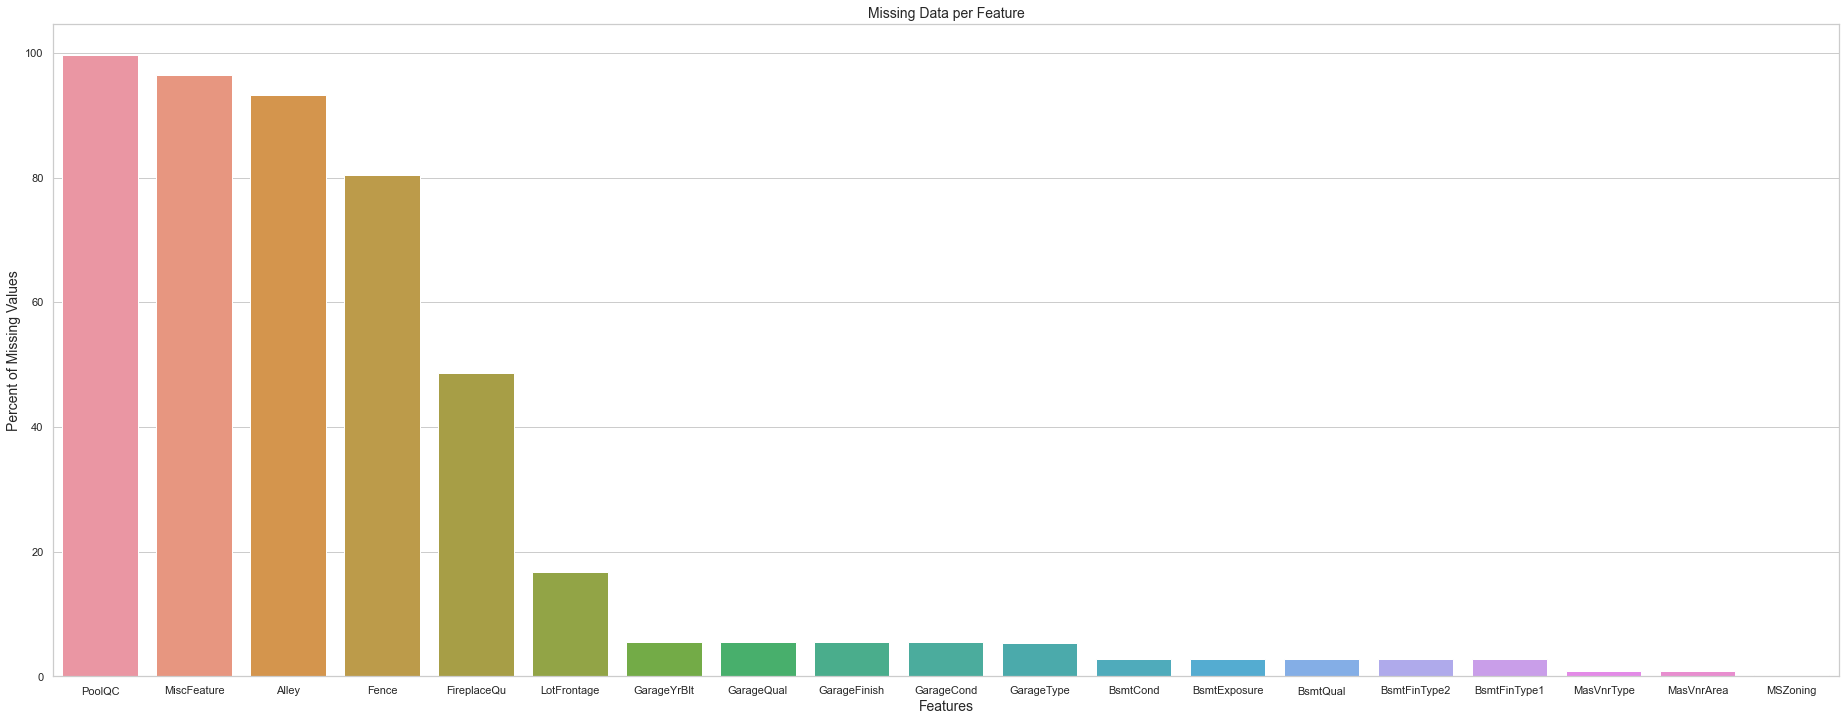

In [215]:
fiveMissingDf = missingDf[missingDf["missing_count"] > 3]

plt.figure(figsize=(32, 12))
sns.barplot(x=fiveMissingDf.index, y="missing_rate", data=fiveMissingDf)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percent of Missing Values', fontsize=14)
plt.title('Missing Data per Feature', fontsize=14)

In [292]:
missingDf

missing_count  missing_rate
PoolQC                 2909     99.657417
MiscFeature            2814     96.402878
Alley                  2721     93.216855
Fence                  2348     80.438506
FireplaceQu            1420     48.646797
LotFrontage             486     16.649538
GarageYrBlt             159      5.447071
GarageQual              159      5.447071
GarageFinish            159      5.447071
GarageCond              159      5.447071
GarageType              157      5.378554
BsmtCond                 82      2.809181
BsmtExposure             82      2.809181
BsmtQual                 81      2.774923
BsmtFinType2             80      2.740665
BsmtFinType1             79      2.706406
MasVnrType               24      0.822199
MasVnrArea               23      0.787941
MSZoning                  4      0.137033
BsmtFullBath              2      0.068517
BsmtHalfBath              2      0.068517
Utilities                 2      0.068517
Functional                2      0.068517
Electrical                1      0.034258
BsmtUnfSF                 1      0.034258
Exterior1st               1      0.034258
Exterior2nd               1      0.034258
SaleType                  1      0.034258
GarageArea                1      0.034258
BsmtFinSF2                1      0.034258
BsmtFinSF1                1      0.034258
TotalBsmtSF               1      0.034258
KitchenQual               1      0.034258
GarageCars                1      0.034258

There are 34 features that are affected by missing values. Let's review this list:
* `FireplaceQu`, `GarageX`, `Alley`, `PoolQC` - all Neighborhoods have alleys systems, fireplaces, garages or pools
* `MiscFeature` is an optional feature that indicates additional benefits of the lot. It impacts the house sale price by `MiscVal` amount.

We may impute reviewed missing features by some constant value that indicates that feature is not part of a lot.

Some of the features do seem to be missing like `SaleType`, `MSZoning`, `Functional`, etc. However, we may not use them, so let's focus on the rest of rest of available information and decide about them later on.

Also, the training dataset have all SalePrice information specified:

In [218]:
trainDf['SalePrice'].isnull().sum()

0

## 1.2 HouseProperties - SalePrice Relations

### 1.2.1 Sale Price Distribution

First things goes first. Let's see SalePrice distribution shape:

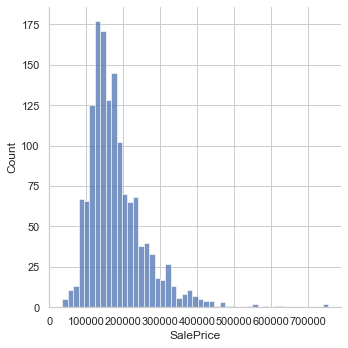

In [281]:
sns.displot(fullDf["SalePrice"])

In [144]:
print("Skewness: %f" % trainDf['SalePrice'].skew())
print("Kurtosis: %f" % trainDf['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


SalePrice distibution resembles a normal distribution that skewed to the left. 

We may want to `apply log scaling` to normalize the SalePrice shape, because ML algorithms performs better on the normally distributed features.

What about SalePrice central tendency?

In [282]:
fullDf['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The `75%` of houses have price `$214k` and less. 25%, 50% and 75% may define a price tiers for us to simplify understand of the catgorical data. With this in mind, let's add a new column `SalePriceGroup` with three tiers:
* Cheap Groups:
    * `Less than 25%` houses (<= $129k)
    * Houses from `25% - 50%` range (>\$129k and <=\$163k)
* Expensive Groups:
    * Houses from `50%-75%` range (>\$163k and <=\$214k)
    * `75% and more` 

In [ ]:
def imputeSalePriceGroup(salePrice):
    if salePrice <= 129975:
        return "25% and less"
    if salePrice > 129975 and salePrice <= 163000:
        return "25% - 50%"
    if salePrice > 163000 and salePrice < 214000:
        return "50% - 75%"
    if salePrice >= 214000:
        return "75% and more"

fullDf['SalePriceGroup'] = fullDf['SalePrice'].apply(imputeSalePriceGroup)

#### 1.3.2 Room Number, Lot and Living Areas, Floor Areas

`Living Area` is suppose to impact `SalePrice`:

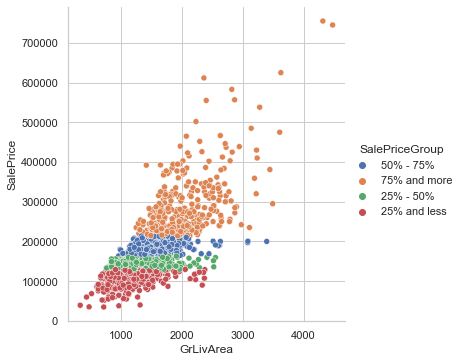

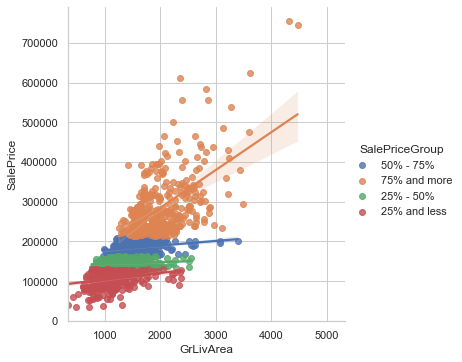

In [283]:
sns.relplot(data=fullDf, x="GrLivArea", y="SalePrice", hue="SalePriceGroup")
sns.lmplot(data=fullDf, x="GrLivArea", y="SalePrice", hue="SalePriceGroup")

The assumption was correct. We see a linear correlation and raising the SalePrice as the living area goes up/right.

There are two outliers. Their area more than 4,000 $ft^2$ but the sale prices are below than an avarage. Let's remove them from the dataset:

In [236]:
fullDf.drop(
    fullDf[(fullDf["GrLivArea"] > 4000) & (fullDf["SalePrice"] < 700000)].index,
    inplace=True
)

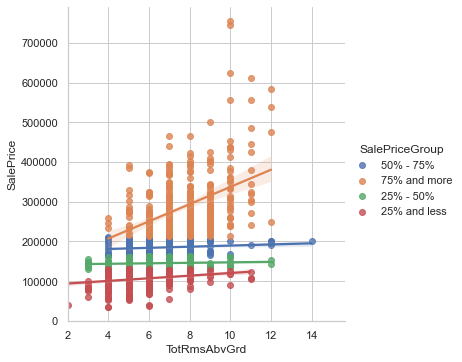

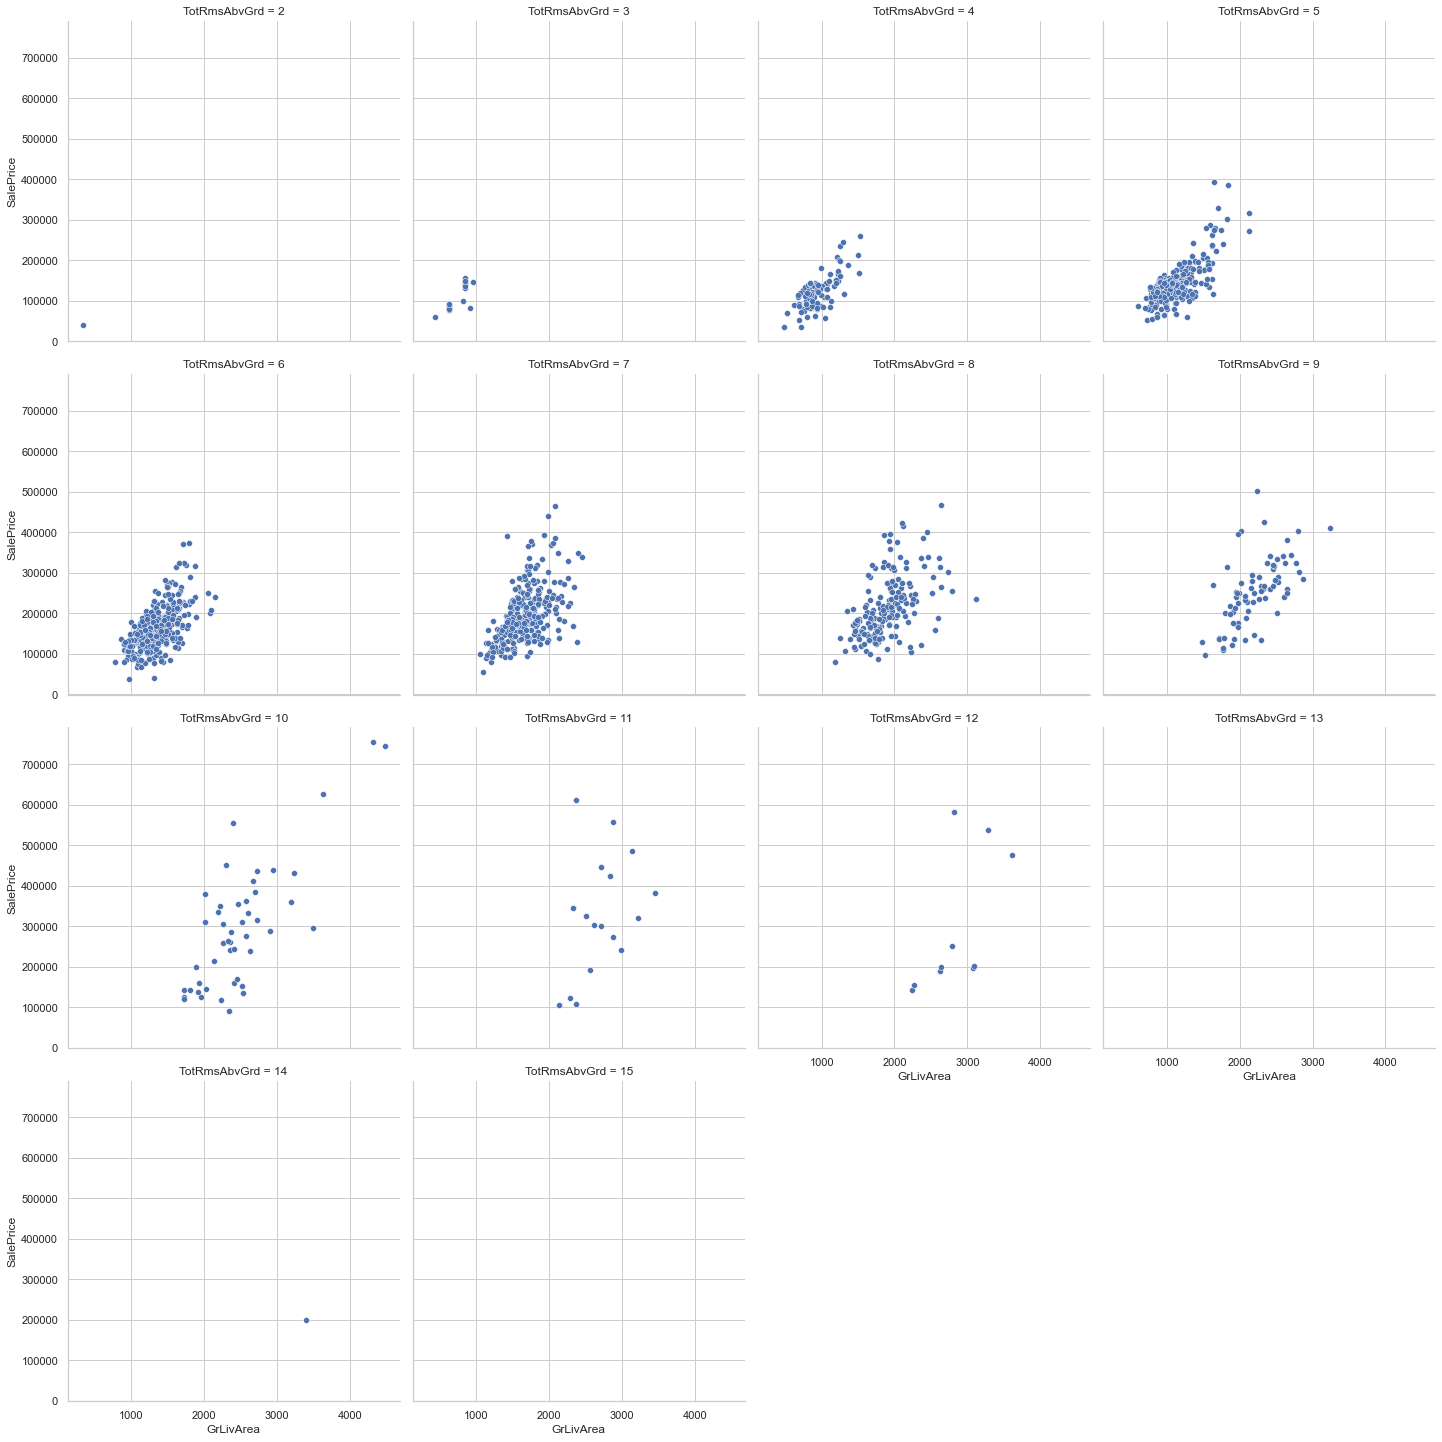

In [284]:
# Total Room Number seems to correlate with SalePrice. Concreatly, below-4-room lots estimated in less than the mean price. Between 4 and 12 rooms, the sale price of the houses started to go up slightly.

# There is 14-room outliner with the price that is around the mean. This seems to be true.

sns.lmplot(data=fullDf, x="TotRmsAbvGrd", y="SalePrice", hue="SalePriceGroup")
sns.relplot(x="GrLivArea", y="SalePrice", col="TotRmsAbvGrd", col_wrap=4, data=fullDf)

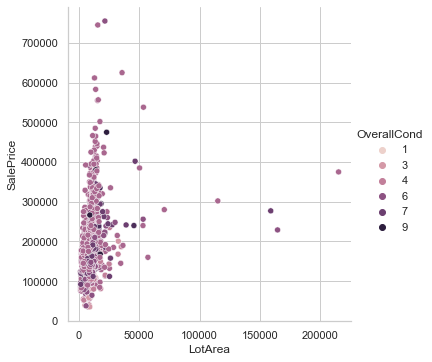

In [240]:
# Most of the house areas are less than 50000 ft^2. So LotArea does not really differentiate the dataset. Probably, a lot of houses have kind of standard area (?)

# We can see a few outliers with area more than 150k
# Could LotArea be useful somehow?

sns.relplot(x="LotArea", y="SalePrice", hue="OverallCond", data=fullDf)

In [242]:
fullDf['LotArea'].describe()

count      2917.000000
mean      10139.439150
std        7807.036512
min        1300.000000
25%        7476.000000
50%        9452.000000
75%       11556.000000
max      215245.000000
Name: LotArea, dtype: float64

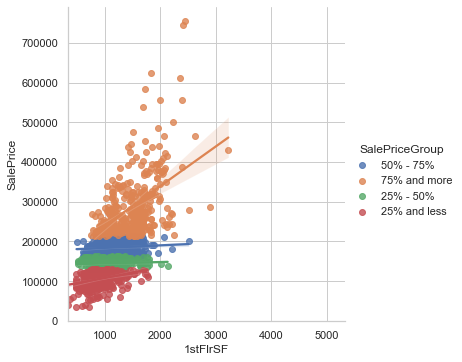

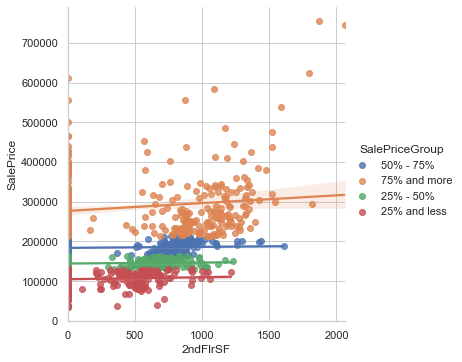

In [241]:
# ?
sns.lmplot(data=fullDf, x="1stFlrSF", y="SalePrice", hue="SalePriceGroup")
sns.lmplot(data=fullDf, x="2ndFlrSF", y="SalePrice", hue="SalePriceGroup")

#### 1.3.4 House Types and Styles

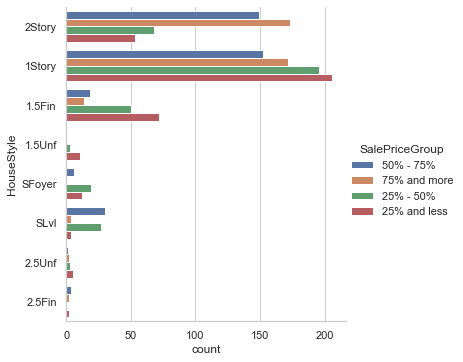

In [243]:
# House Styles correlate with sale prices
# House prices > 75% perc: 2Story, 1Story 1.5Fin
# House prices > 50% and > 75% perc: 2Story, 1Story, SLvl, 2.5Fin
# House prices < 25% and > 50% perc: 1Story, 2Story, 1.5Fin, SLvl, 2.5Unf, 1.5Unf
# House prices < 25% perc: 1.5Fin, 1.5Unf, 2.5Unf

sns.catplot(y="HouseStyle", hue="SalePriceGroup", kind="count", data=fullDf)

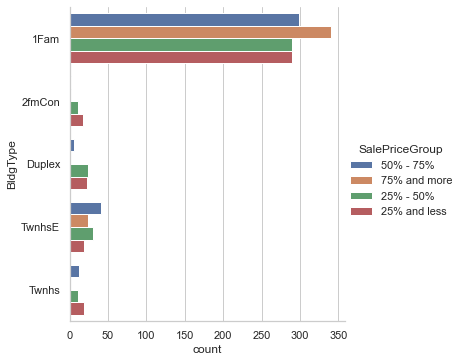

In [244]:
# Dwelling Type correlates house sale price
## House prices > 75% perc: 1Fam, TwnhsE
## House prices > 50% and < 75% perc: 1Fam, TwnhsE, TwnhsI
## House prices > 25% and < 50% perc: 1Fam, 2FamCon, TwnhsE, TwnhsI, Duplex
## House prices < 25% perc: 1Fam, 2fmCon, TwnhsE, TwnhsI, Duplex

sns.catplot(y="BldgType", hue="SalePriceGroup", kind="count", data=fullDf)

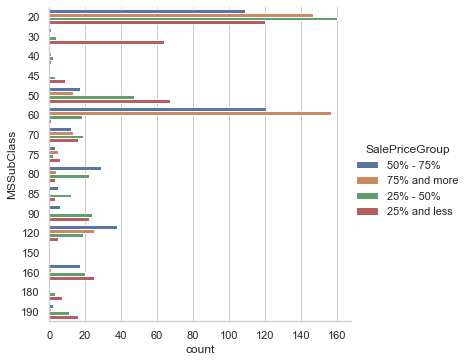

In [245]:
# MSSubClass type of dwelling is a helpful differentiator of the sale price
## House prices > 75% perc: 20, 60, 70, 75, 80, 120 (1 and 2 story of 1946 and newer)
## House prices > 50% and < 75% perc: 20, 60, 80, 120, 160 (diff styles of newer types)
## House prices > 25% and < 50% perc: 20, 30, 40, 45, 50, 60, 70, 80, 85, 90, 120, 160, 190
## House prices < 25% perc: 20, 30, 45, 50, 70, 75, 90, 120, 160, 190 (Older and unfinished styles)

sns.catplot(y="MSSubClass", hue="SalePriceGroup", kind="count", data=fullDf)

In [383]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

unselectedFeatureDf = trainDf[['MSSubClass', 'BldgType', 'HouseStyle']]
unselectedFeatureDf['BldgType'] = LabelEncoder().fit_transform(unselectedFeatureDf['BldgType'])
unselectedFeatureDf['MSSubClass'] = LabelEncoder().fit_transform(unselectedFeatureDf['MSSubClass'])
unselectedFeatureDf['HouseStyle'] = LabelEncoder().fit_transform(unselectedFeatureDf['HouseStyle'])

fs = SelectKBest(score_func=chi2, k='all')
fs.fit_transform(unselectedFeatureDf, trainDf['SalePrice'])

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 2600.032593
Feature 1: 1951.478245
Feature 2: 812.887720


LotShape and LotConfig

<AxesSubplot:xlabel='count', ylabel='LotConfig'>

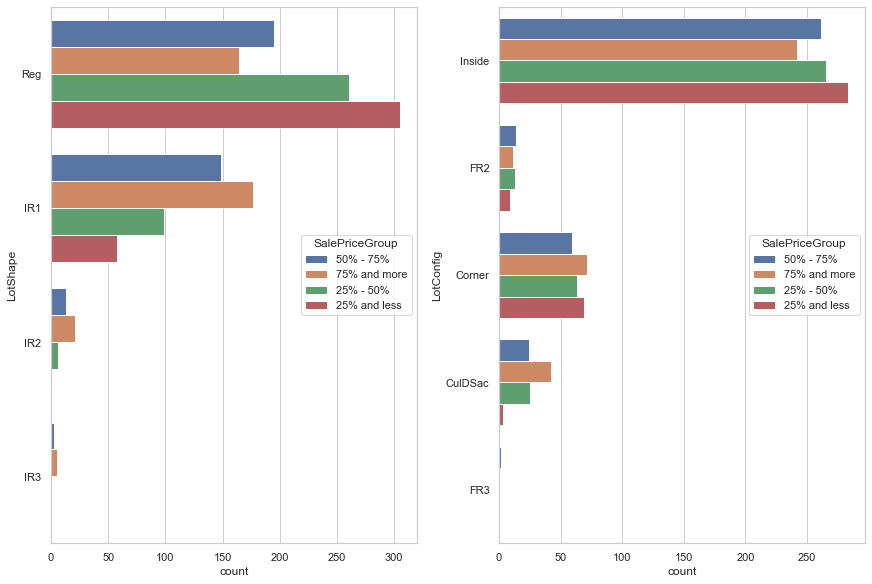

In [246]:
# Houses with SalePrice > 75% percentile dominate amoung houses with irregular shape. 
# Most of the Houses with SalePrice < 25% have a regular shape tho.

# Lot configuration: 
## Houses with SalePrice > 75% percentile have Corner, Inside, FR2, CulDSac types
## Houses with SalePrice < 25% have mostly inside types and also Corner and FR2 types
# More info: https://www.thetruthaboutrealty.com/real-estate-lot-types/

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="LotShape", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="LotConfig", hue="SalePriceGroup", ax=ax[1])

In [384]:
unselectedFeatureDf = trainDf[['LotShape', 'LotConfig']]
unselectedFeatureDf['LotShape'] = LabelEncoder().fit_transform(unselectedFeatureDf['LotShape'])
unselectedFeatureDf['LotConfig'] = LabelEncoder().fit_transform(unselectedFeatureDf['LotConfig'])

fs = SelectKBest(score_func=chi2, k='all')
fs.fit_transform(unselectedFeatureDf, trainDf['SalePrice'])

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 802.972897
Feature 1: 564.633630


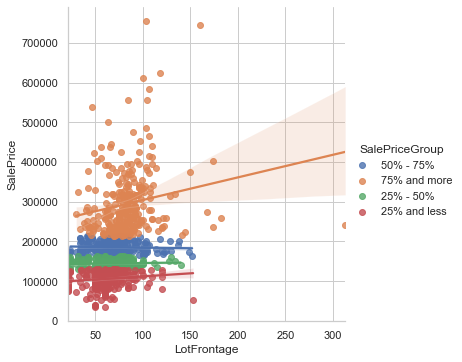

In [247]:
# ?
sns.lmplot(data=fullDf, x="LotFrontage", y="SalePrice", hue="SalePriceGroup")

LandContour and LandSlope

<AxesSubplot:xlabel='count', ylabel='LandSlope'>

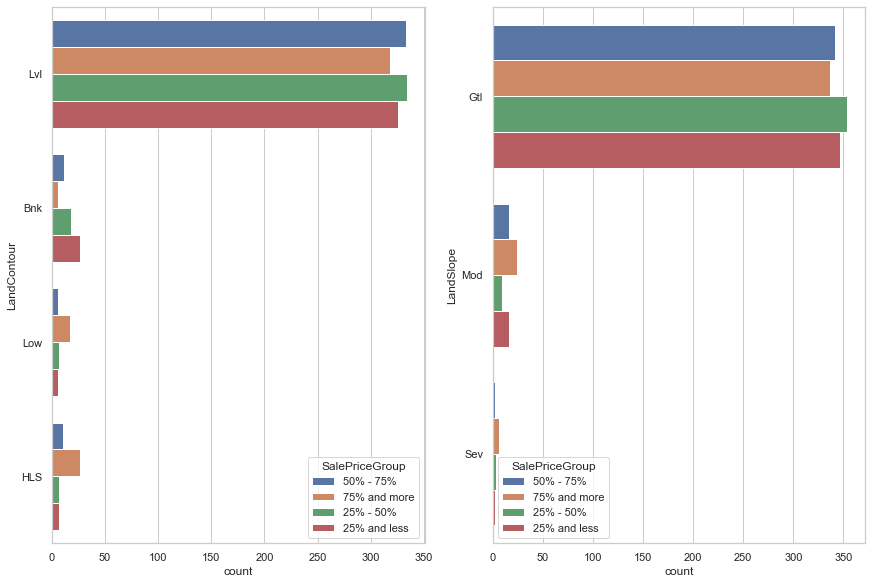

In [248]:
# Land Contour
## Low and hillside flatness as well as moderate and severe slopes dominate amoung house with SalePrice > 75% percentile. Probably, these houses have some kind of landscape design work done

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="LandContour", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="LandSlope", hue="SalePriceGroup", ax=ax[1])

#### Foundation

<AxesSubplot:xlabel='count', ylabel='BsmtExposure'>

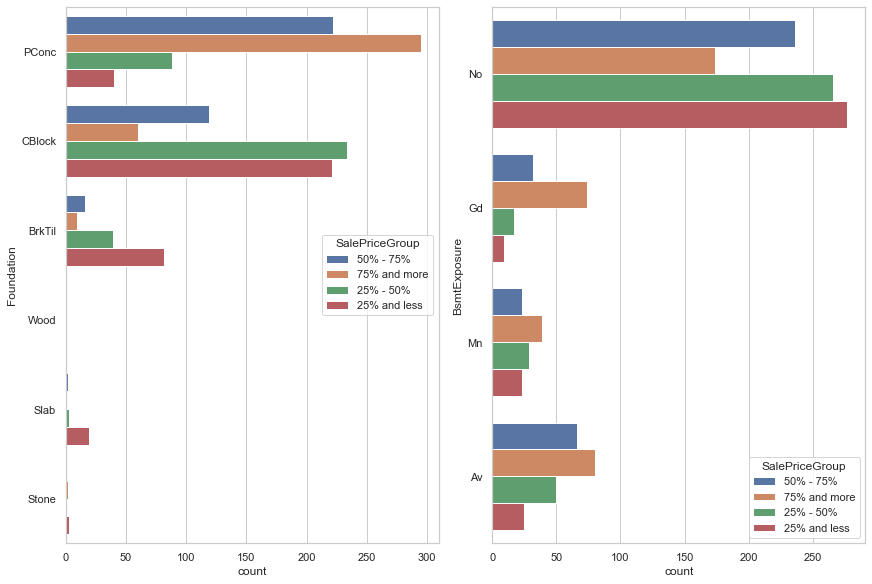

In [249]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="Foundation", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="BsmtExposure", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='BsmtFinType2'>

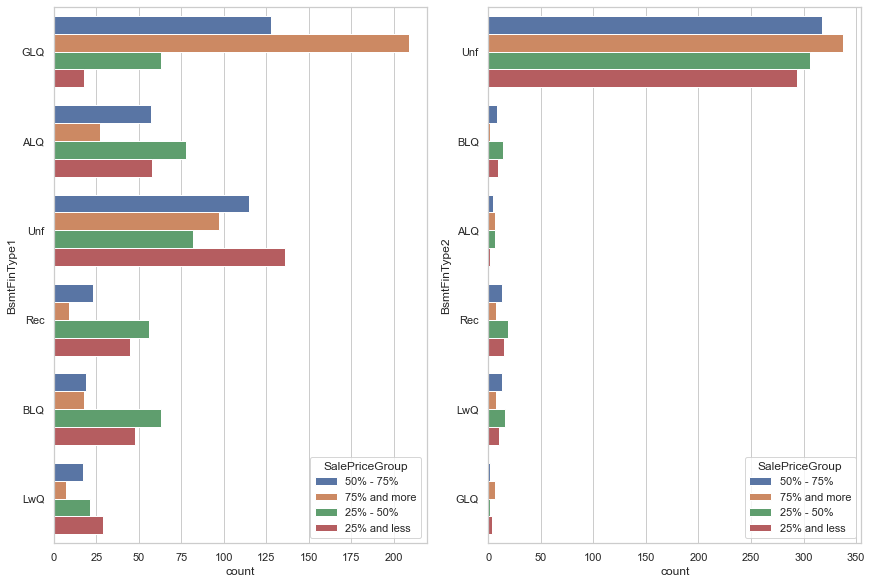

In [105]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="BsmtFinType1", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="BsmtFinType2", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='BsmtCond'>

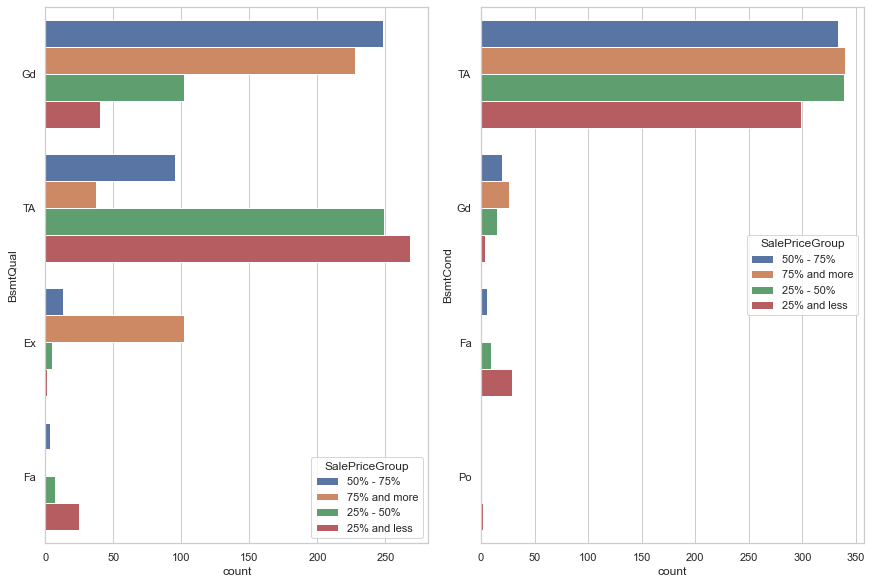

In [103]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="BsmtQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="BsmtCond", hue="SalePriceGroup", ax=ax[1])

House Overall Condition and Material Quality

<AxesSubplot:xlabel='count', ylabel='OverallQual'>

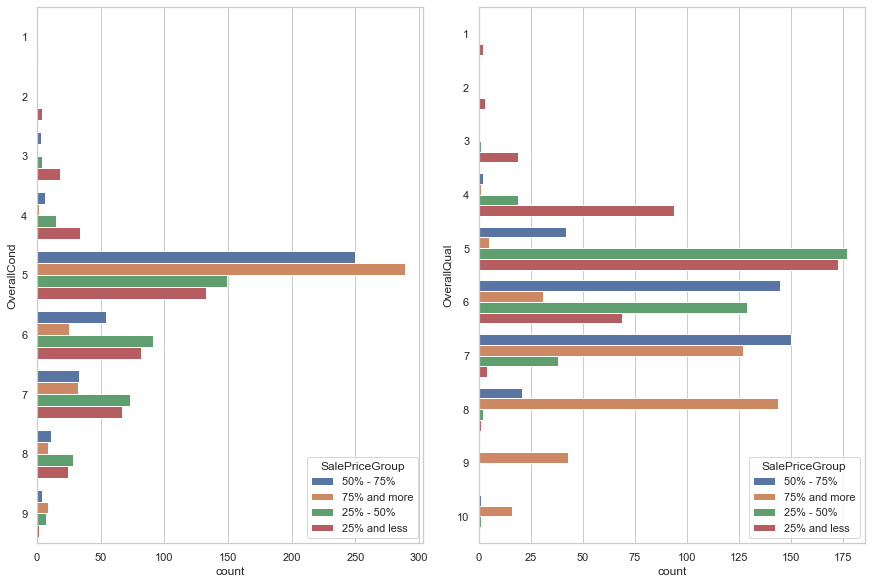

In [88]:
# Overall Condition and Material Quality storongly correlates with SalePrices.
## Houses with SalePrice > 50% percentile have avarage and higher overall condition. Lots with SalePrice < 50% percentile have a higher percentage among below avarage condition houses, but generally they are included to all condition groups.
## Overral Material Quality seems to differentiate expensive houses from cheap. Lots with SalePrice < 50% percentile dominates in avarage and below quality groups. In above avarage quality groups there are a bigger percentage of houses with SalePrice > 50% (particullary, lots with SalePrice > 75% prevail in very good and above quality groups)

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="OverallCond", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="OverallQual", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Functional'>

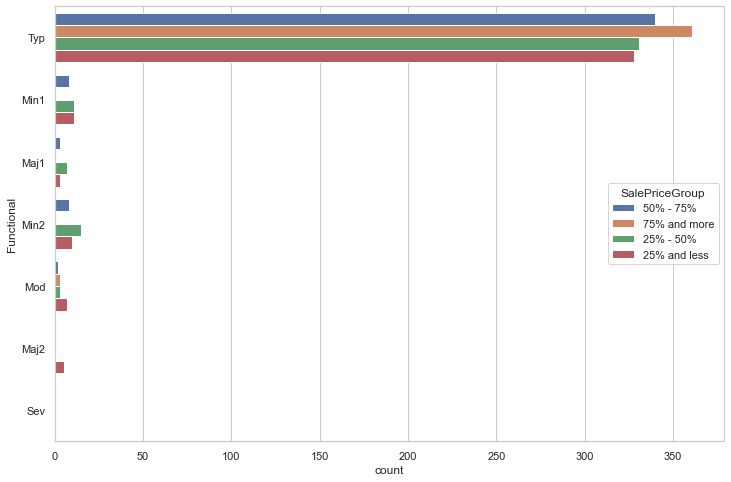

In [82]:
# Home functionality affects house sale price. 
# Samples with a functionality other than "Typical" losses sale prices drastically.

sns.countplot(data=fullDf, y="Functional", hue="SalePriceGroup")

# There is a outliner with Moderate functionality that costs more than $500k

Year Built and Renovate

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

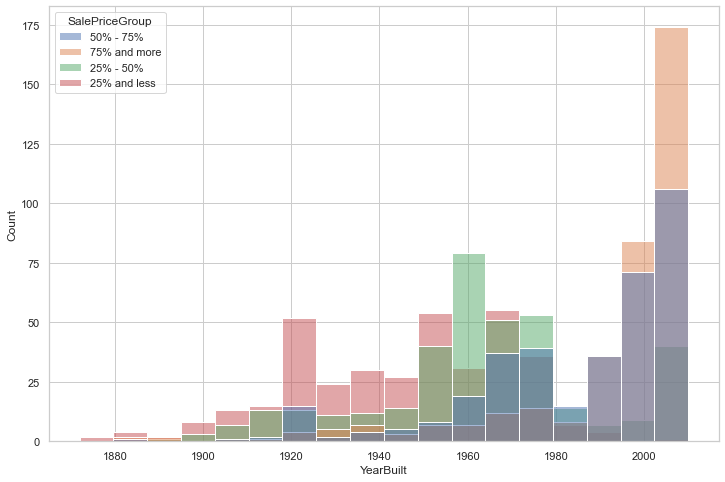

In [87]:
# YearBuilt impacts SalePrice. Most of the cheap houses (<50% percentile) are built in between of 1880 and 1970
# Expensive houses (>50%) have been built recently

sns.histplot(data=fullDf, x="YearBuilt", hue="SalePriceGroup")

House Access

<AxesSubplot:xlabel='count', ylabel='Street'>

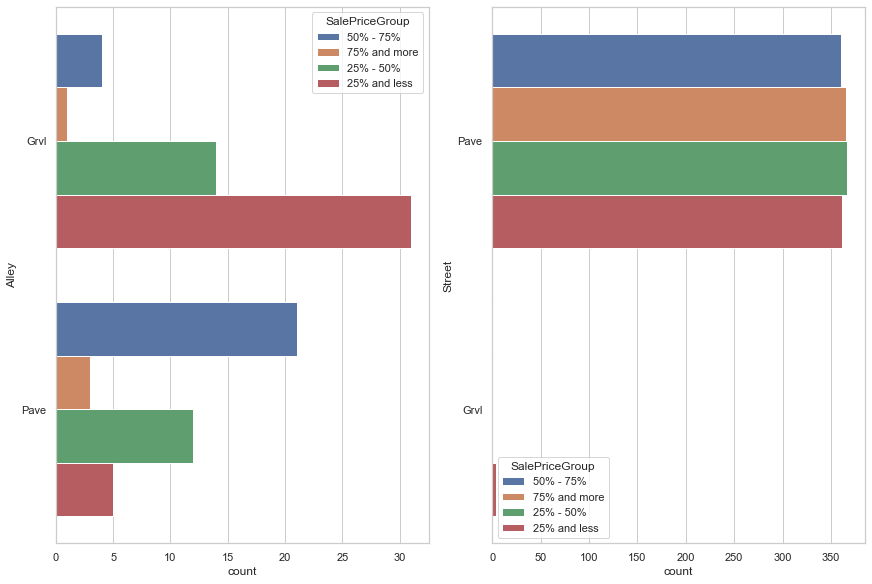

In [86]:
# Most of houses that have SalePrice < 50% connected with gravel alleys or gravel streets.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="Alley", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Street", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='PavedDrive'>

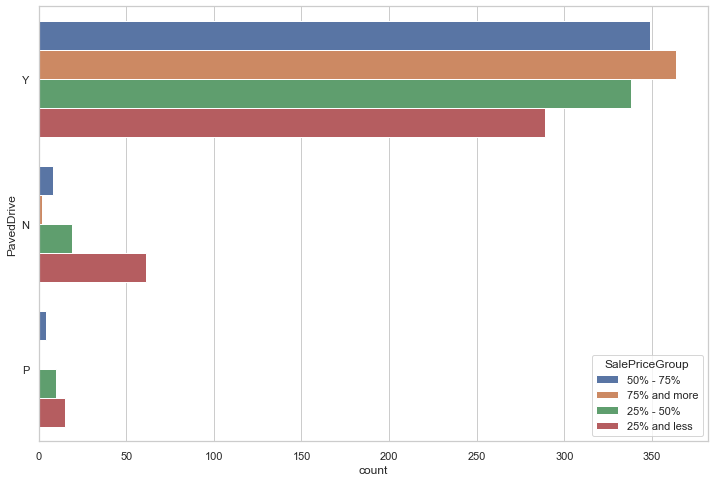

In [85]:
# Conclusions?

sns.countplot(data=fullDf, y="PavedDrive", hue="SalePriceGroup")

House Location: Neighborhood, Zoning and Additional Conditions

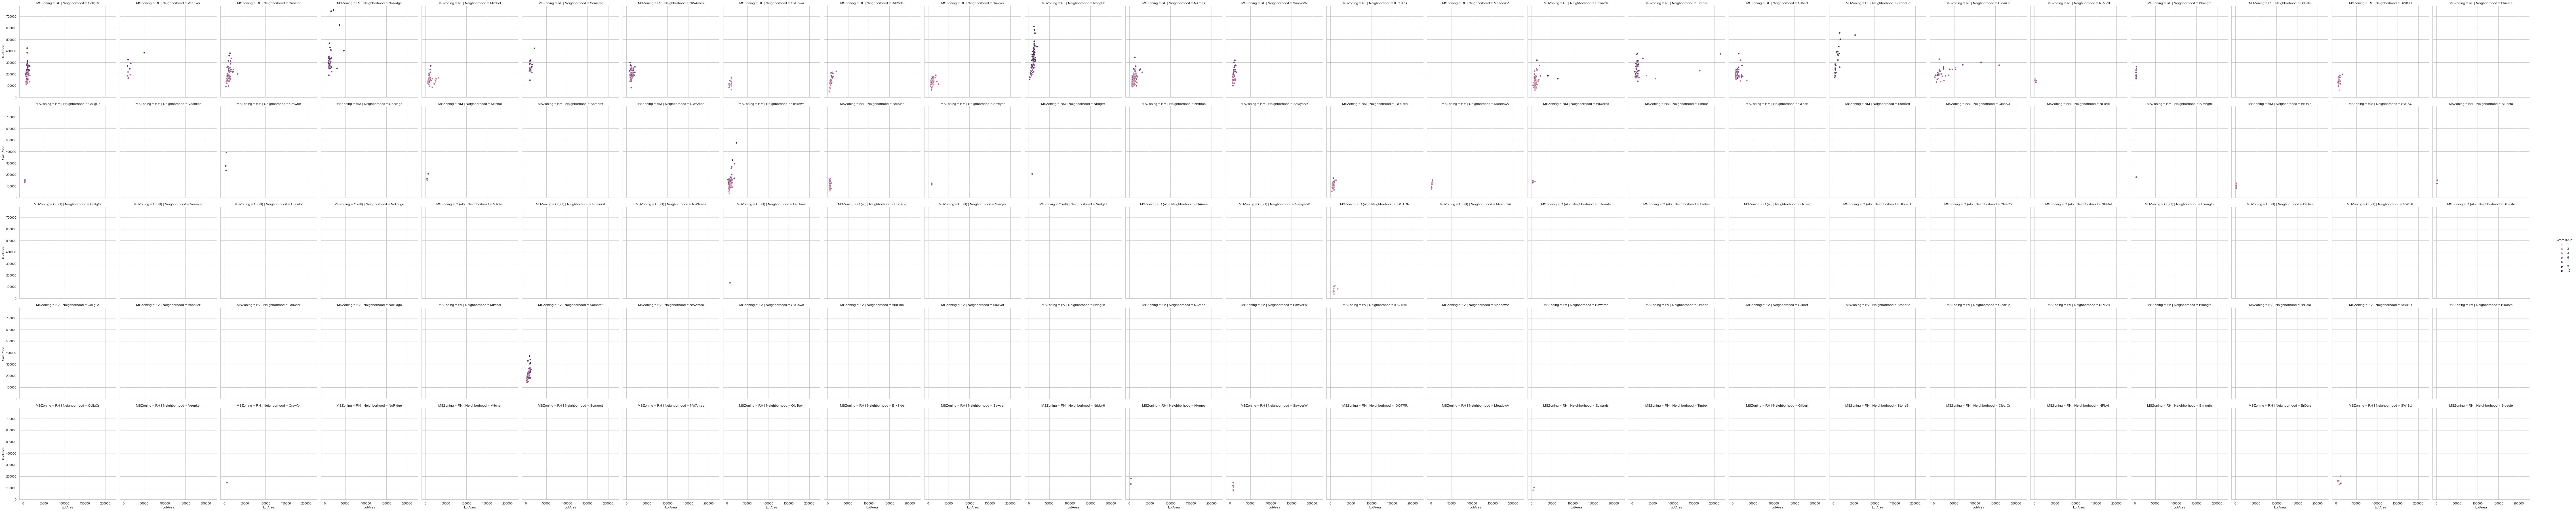

In [35]:
# Neighborhood and MSZoning do differentiate dataset:

# Zoning with house price above the mean: RL, FV
# Zoning with house price below the mean: RM, C, RH

# Neighborhoods with house price below the mean: IDOTRR, Swisu, DrDale, NPkVill, MeadowV, Sawyer, OldTown, Edwards, NAmes
# Neighborhoods with house price above the mean: NoRidge, Mitchel, Crawfor, SawyerW, Timber, Somerst, CollgeCr, Gilbert, NWAmes
# Neighborhoods with house price above 75% perct: NridgHt, CollgeCr, Crawfor, Timber, StoreBr

#https://www.investopedia.com/terms/z/zoning.asp#:~:text=Zoning%20allows%20local%20governments%20to,among%20other%20more%20specific%20designations.

sns.relplot(x="LotArea", y="SalePrice", hue="OverallQual", col="Neighborhood", row="MSZoning", data=fullDf)

<AxesSubplot:xlabel='count', ylabel='MSZoning'>

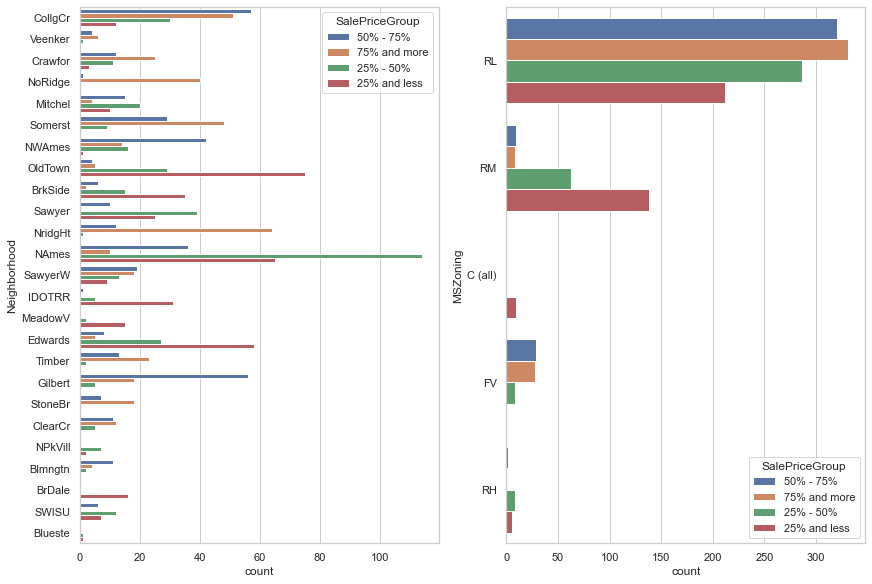

In [250]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Neighborhood", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="MSZoning", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Condition2'>

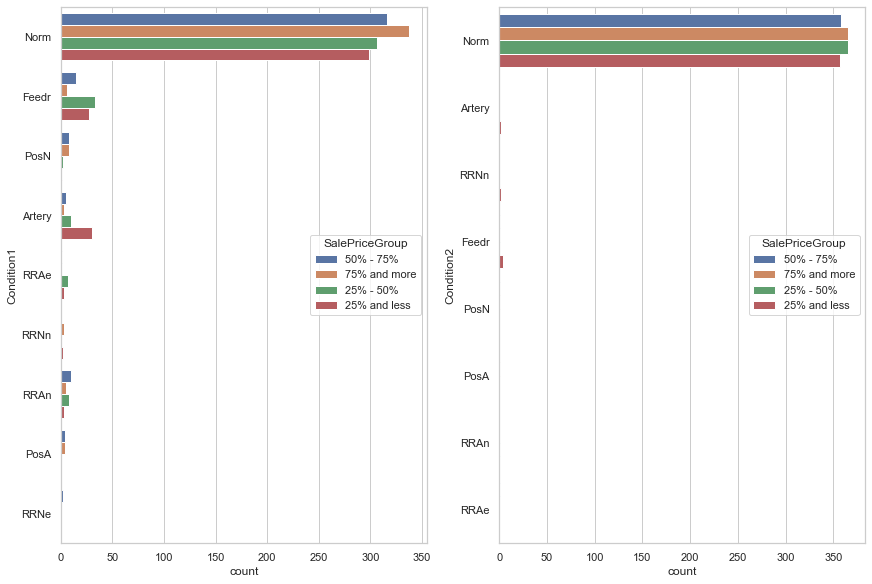

In [37]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Condition1", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Condition2", hue="SalePriceGroup", ax=ax[1])

#### Roof Properties

<AxesSubplot:xlabel='count', ylabel='RoofMatl'>

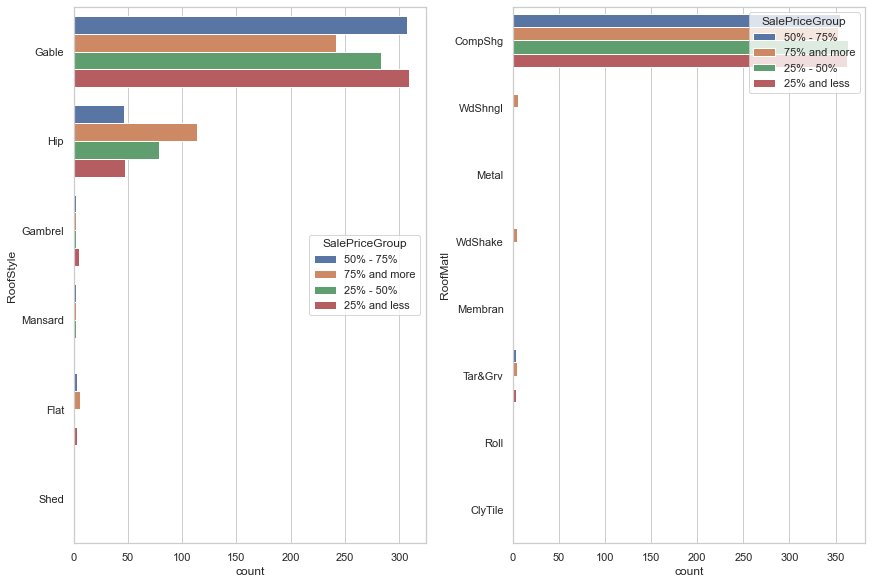

In [38]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="RoofStyle", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="RoofMatl", hue="SalePriceGroup", ax=ax[1])

House Exterior Properties

<AxesSubplot:xlabel='count', ylabel='Exterior2nd'>

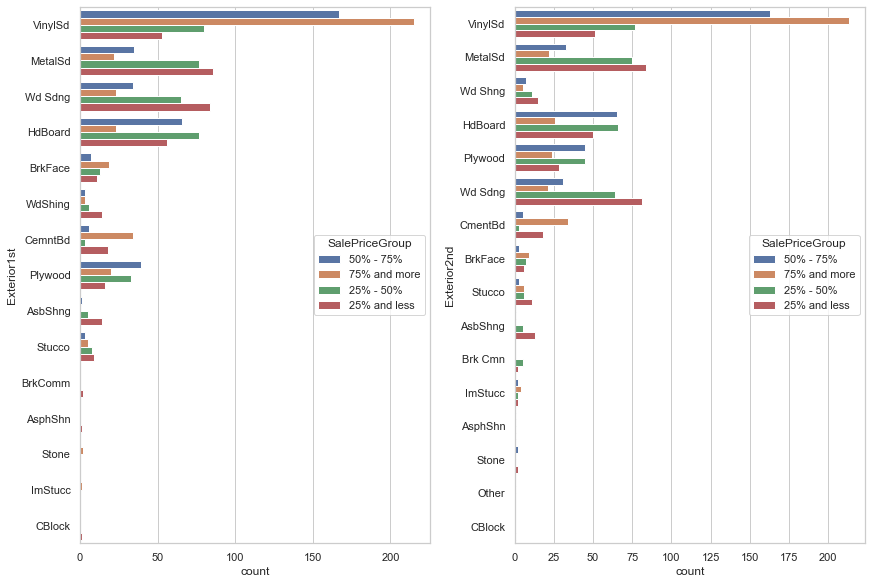

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Exterior1st", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Exterior2nd", hue="SalePriceGroup", ax=ax[1])

#### Masonry Veneer

<AxesSubplot:xlabel='count', ylabel='MasVnrType'>

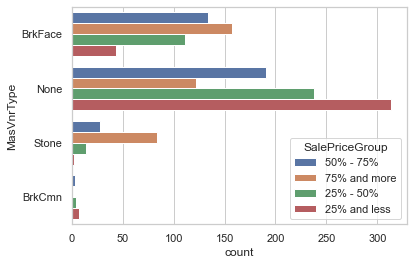

In [77]:
# ?
sns.countplot(data=fullDf, y="MasVnrType", hue="SalePriceGroup")

<AxesSubplot:xlabel='count', ylabel='ExterCond'>

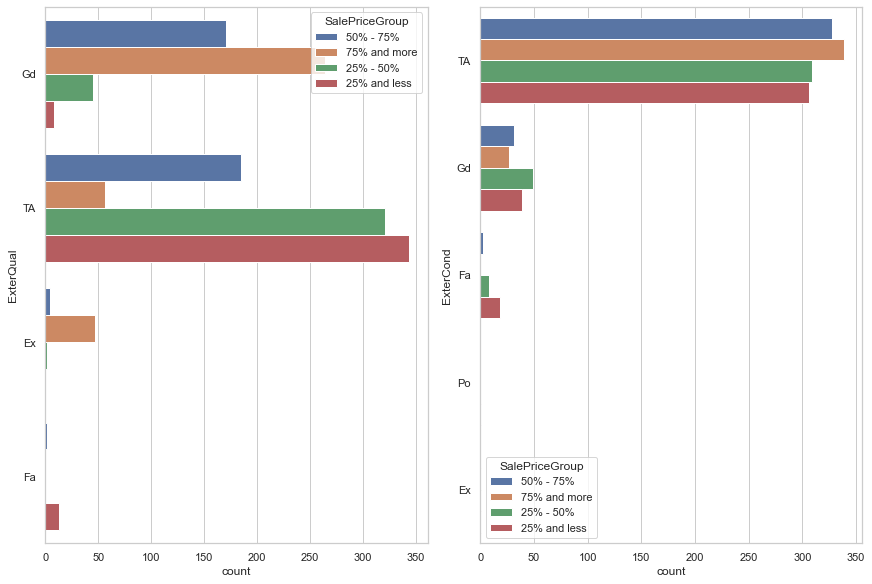

In [40]:
# Houses with SalePrice > 75% percentile have mostly good or exellent exterior quality. They also have avarage or good conditions.

## Houses with SalePrice < 50% percentile have mostly avarage quality and avarage condition.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="ExterQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="ExterCond", hue="SalePriceGroup", ax=ax[1])

Heating, Air Condition and Electrical Systems, Utilities

<AxesSubplot:xlabel='count', ylabel='HeatingQC'>

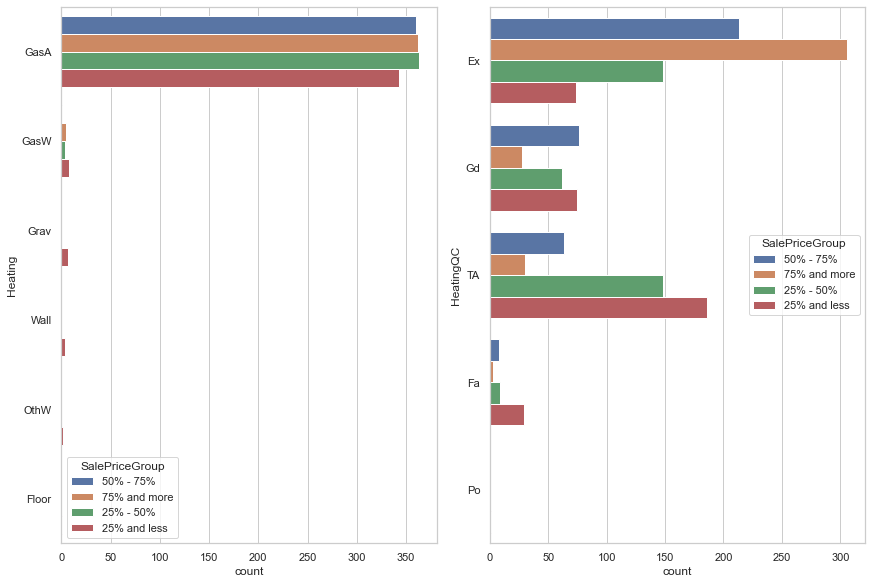

In [93]:
# Heating Types does differentiate samples with sale price below the mean
# Namely, wall, gravity, floor furneses and other heating were installed in houses that cheaper than the mean

# It seems like the mentioned heating systems are old fashin. Here is the YearBuilt ranges:
# Grav - 1910-1941
# Floor - 1949
# OthW - 1872-1917
# Wall - 1945-1952

# GasW - 1880-1970
# GasA - 1875-2010

## Most houses with SalePrice > 50% have from exellent to avarage qualtity of heating. Lower quality types includes mostly houses from < 50% percentile.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="Heating", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="HeatingQC", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Electrical'>

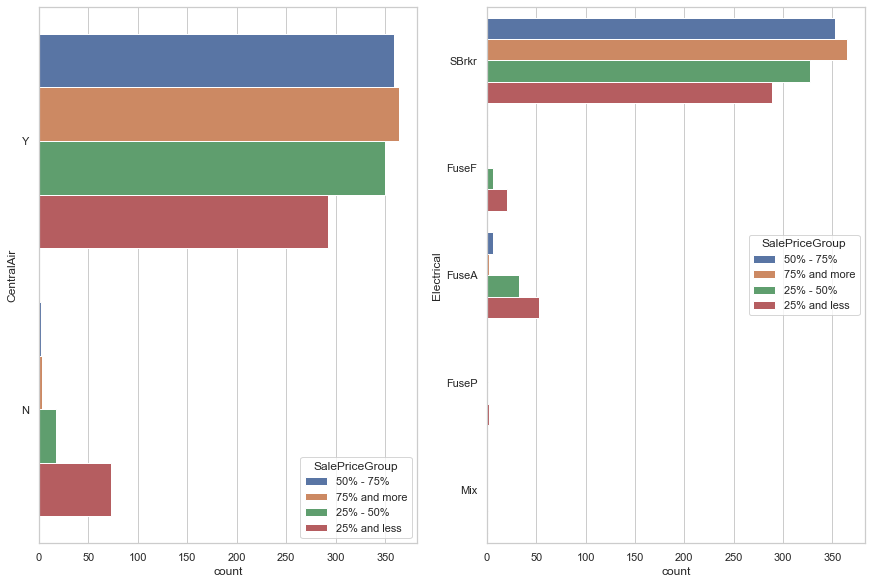

In [42]:
# Central AC seems to be an popular option in the dataset. Most of the houses from >50% percentile have it. 
# Central AC is not installed in cheap (<25% percentile) houses.
## More Info: https://www.thisoldhouse.com/heating-cooling/21018992/read-this-before-you-install-central-air-conditioning

# Most of the houses have "Standard Circuit Breakers & Romex" type of electricity. Houses from >50% dominates there. The rest of options are hold by <50% houses. They seem to be in the worst conditons.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="CentralAir", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Electrical", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Utilities'>

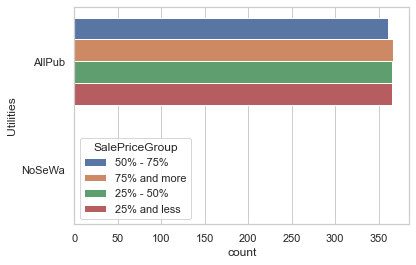

In [43]:
# Utilities feature has only one value in the dataset

sns.countplot(data=fullDf, y="Utilities", hue="SalePriceGroup")

In [44]:
fullDf[fullDf['Utilities'] != 'AllPub']

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
944       1344         0          0   NaN             3     1Fam       TA   
1915       810         0          0   NaN             1     1Fam      NaN   
1945      1474         0          0   NaN             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... Street TotRmsAbvGrd  \
944            No       111.0       354.0  ...   Pave            7   
1915          NaN         0.0         0.0  ...   Grvl            4   
1945           No         0.0         0.0  ...   Pave            7   

      TotalBsmtSF  Utilities WoodDeckSF  YearBuilt YearRemodAdd YrSold  \
944         819.0     NoSeWa          0       1958         1958   2009   
1915          0.0        NaN        119       1910         1950   2009   
1945       1632.0        NaN          0       1952         1952   2008   

     SalePriceGroup LivAreaSqFtPrice  
944       25% - 50%       102.306548  
1915           None              NaN  
1945           None              NaN  

[3 rows x 83 columns]

Kitchen Properties

<AxesSubplot:xlabel='count', ylabel='KitchenAbvGr'>

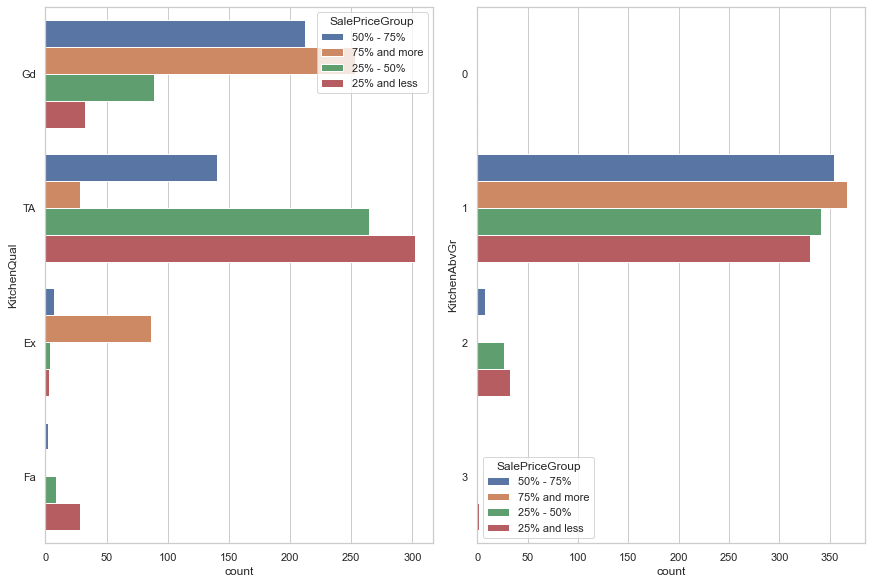

In [45]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="KitchenQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="KitchenAbvGr", hue="SalePriceGroup", ax=ax[1])

Bathroom Properties

<AxesSubplot:xlabel='count', ylabel='HalfBath'>

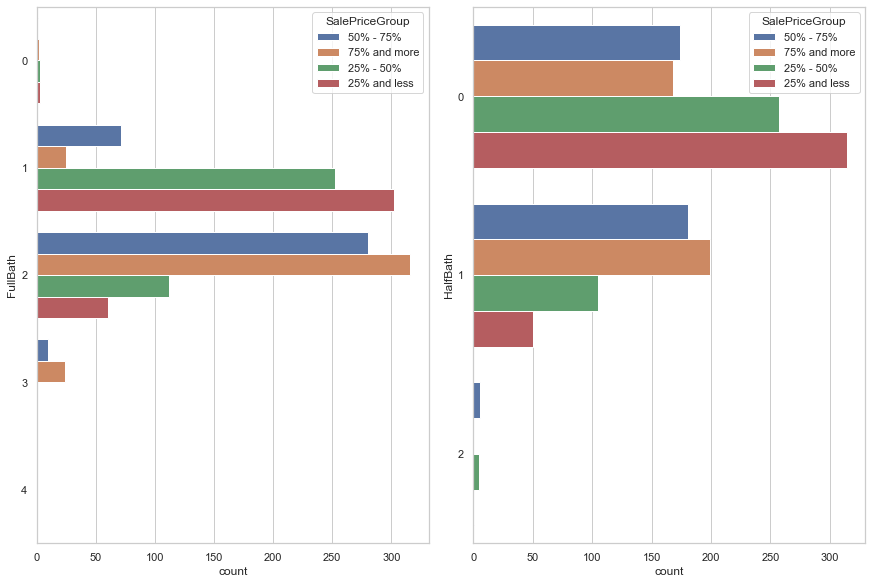

In [101]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="FullBath", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="HalfBath", hue="SalePriceGroup", ax=ax[1])

#### Garage Properties

<AxesSubplot:xlabel='count', ylabel='GarageCars'>

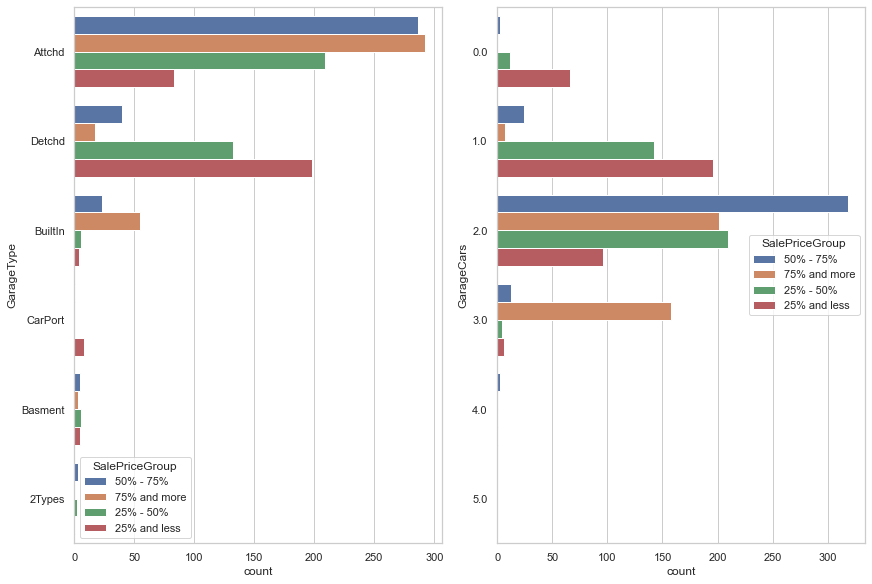

In [94]:
# Attached and Builtin garage types dominates among expensive houses (>50%). Their garages can contain 2 or 3 cars commonly. 
## Detached, CarPort types dominates among cheap houses (<50%). Their garage capacity is 1 car. No garages are also dominates among cheap houses.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="GarageType", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="GarageCars", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='GarageCond'>

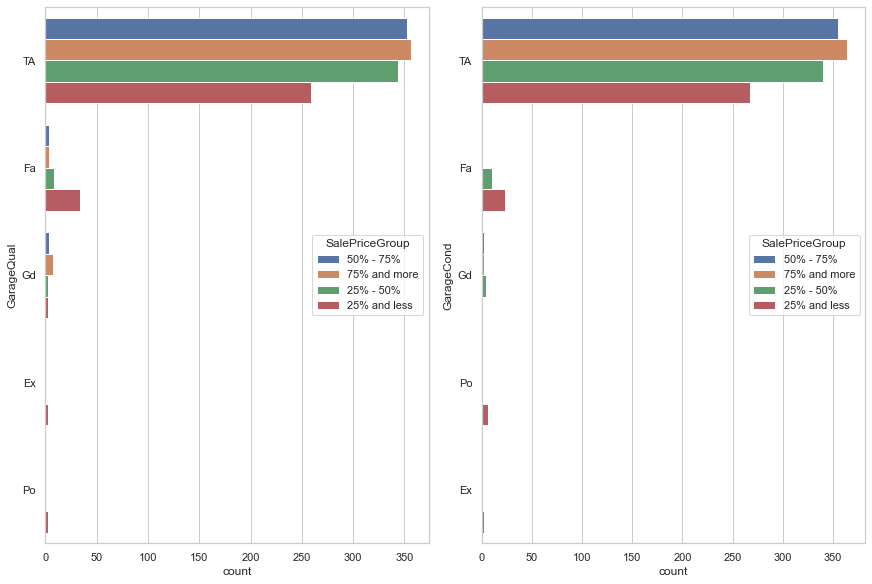

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="GarageQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="GarageCond", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='GarageFinish'>

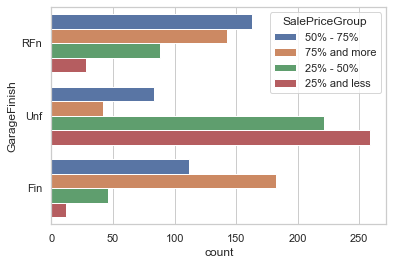

In [48]:
# Garage Finish correlates with house price. Most of the expensive houses (>50%) have garage finished or roughly finished. Unfinished garages were sold with cheap houses (<50%)

sns.countplot(data=fullDf, y="GarageFinish", hue="SalePriceGroup")

#### Fireplaces

<AxesSubplot:xlabel='count', ylabel='FireplaceQu'>

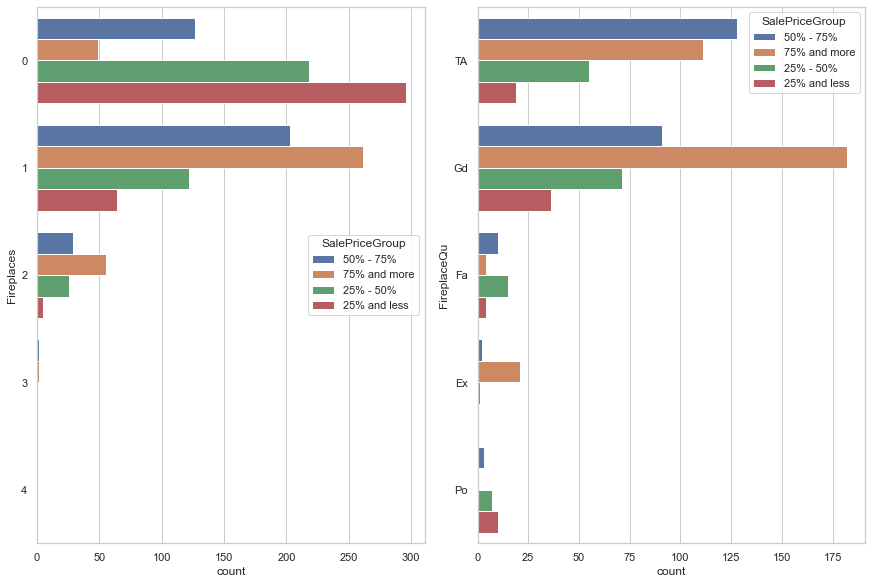

In [95]:
# Most of the cheap houses (<50%) don't have fireplaces or have one (most of the them are good or below avarage quality). Most of the expensive houses have 1 or 2 fireplaces with exellent, good or avarage quality.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="Fireplaces", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="FireplaceQu", hue="SalePriceGroup", ax=ax[1])

#### Pool

<AxesSubplot:xlabel='count', ylabel='PoolQC'>

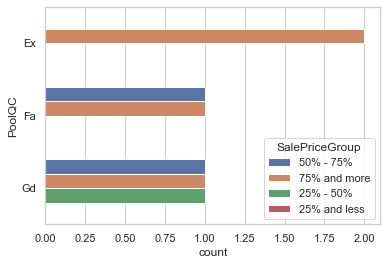

In [50]:
# Just a few lots have pools. None of houses that are cheaper than 25% have pools.
# There is an outlier with SalePrice < 50% and pool installed

sns.countplot(data=fullDf, y="PoolQC", hue="SalePriceGroup")

In [51]:
# Outlier

fullDf[(fullDf["SalePriceGroup"] == "25% - 50%") & (fullDf["PoolQC"] == 'Gd')][[
    'SalePrice',
    'PoolQC',
    'PoolArea',
    'TotRmsAbvGrd',
    'LotArea',
    'GrLivArea',
    'Neighborhood',
]]

SalePrice PoolQC  PoolArea  TotRmsAbvGrd  LotArea  GrLivArea  \
1298   160000.0     Gd       480            12    63887       5642   

     Neighborhood  
1298      Edwards

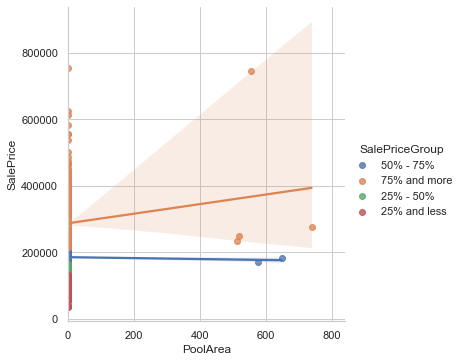

In [251]:
# ?
sns.lmplot(data=fullDf, x="PoolArea", y="SalePrice", hue="SalePriceGroup")

Fence

<AxesSubplot:xlabel='count', ylabel='Fence'>

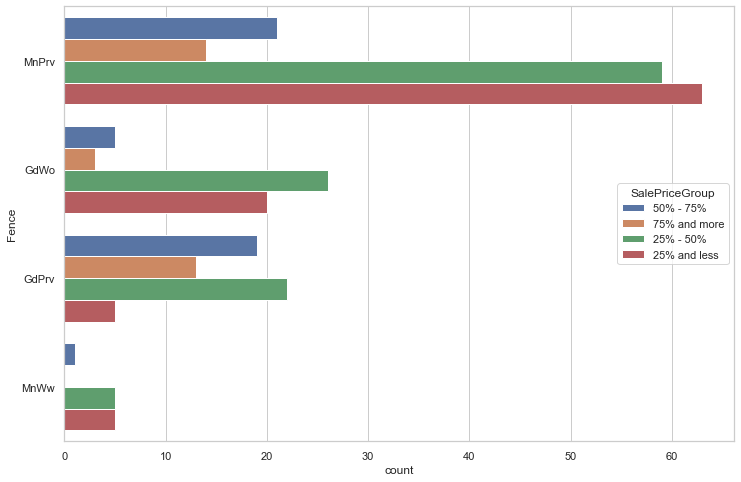

In [252]:
# Expensive houses (>50%) have good privacy/wood fences. Cheap houses (<50%) have minimal privacy/wood fences.

sns.countplot(data=fullDf, y="Fence", hue="SalePriceGroup")

Sale Information

<AxesSubplot:xlabel='count', ylabel='SaleCondition'>

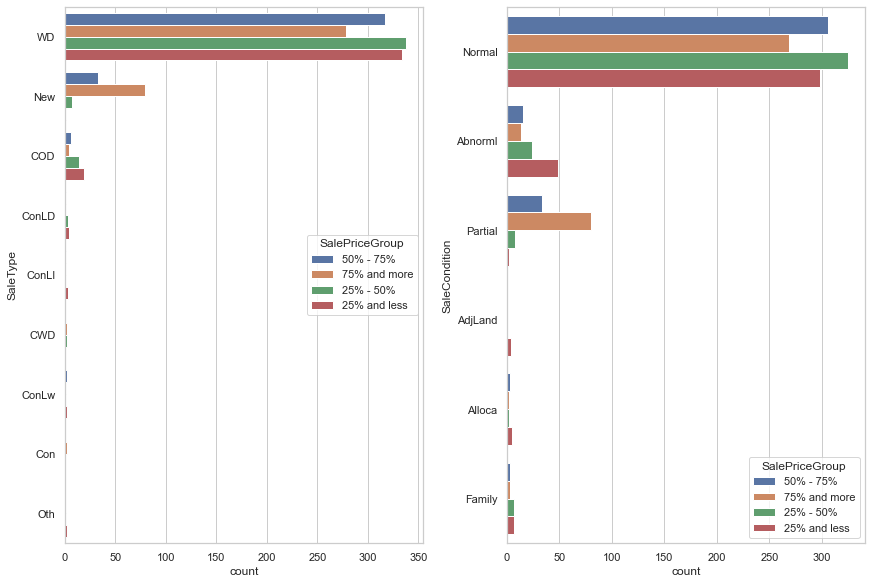

In [254]:


fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="SaleType", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="SaleCondition", hue="SalePriceGroup", ax=ax[1])

In [ ]:
def imputeLivAreaSqFtPrice(saleInfo):
    totalLivingArea = saleInfo[0]
    salePrice = saleInfo[1]

    return salePrice / totalLivingArea

fullDf['LivAreaSqFtPrice'] = fullDf[['GrLivArea', 'SalePrice']].apply(imputeLivAreaSqFtPrice, axis=1)

<AxesSubplot:xlabel='MoSold,YrSold'>

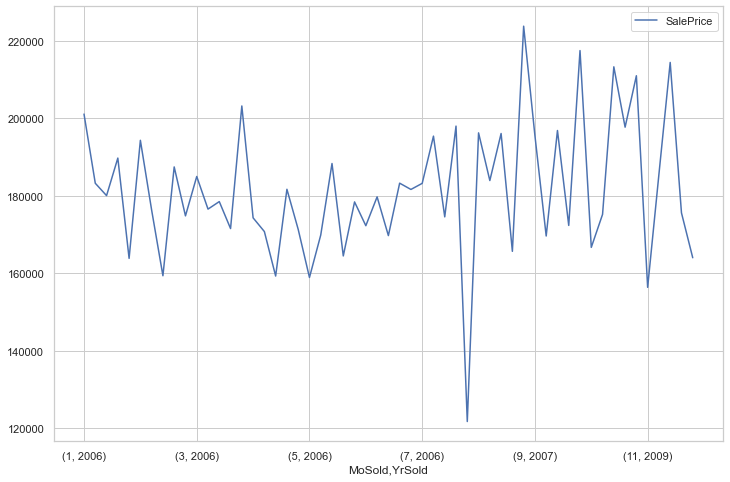

In [255]:
fullDf.groupby(['MoSold', 'YrSold'])[['SalePrice']].mean().plot()


### Correlation

<AxesSubplot:>

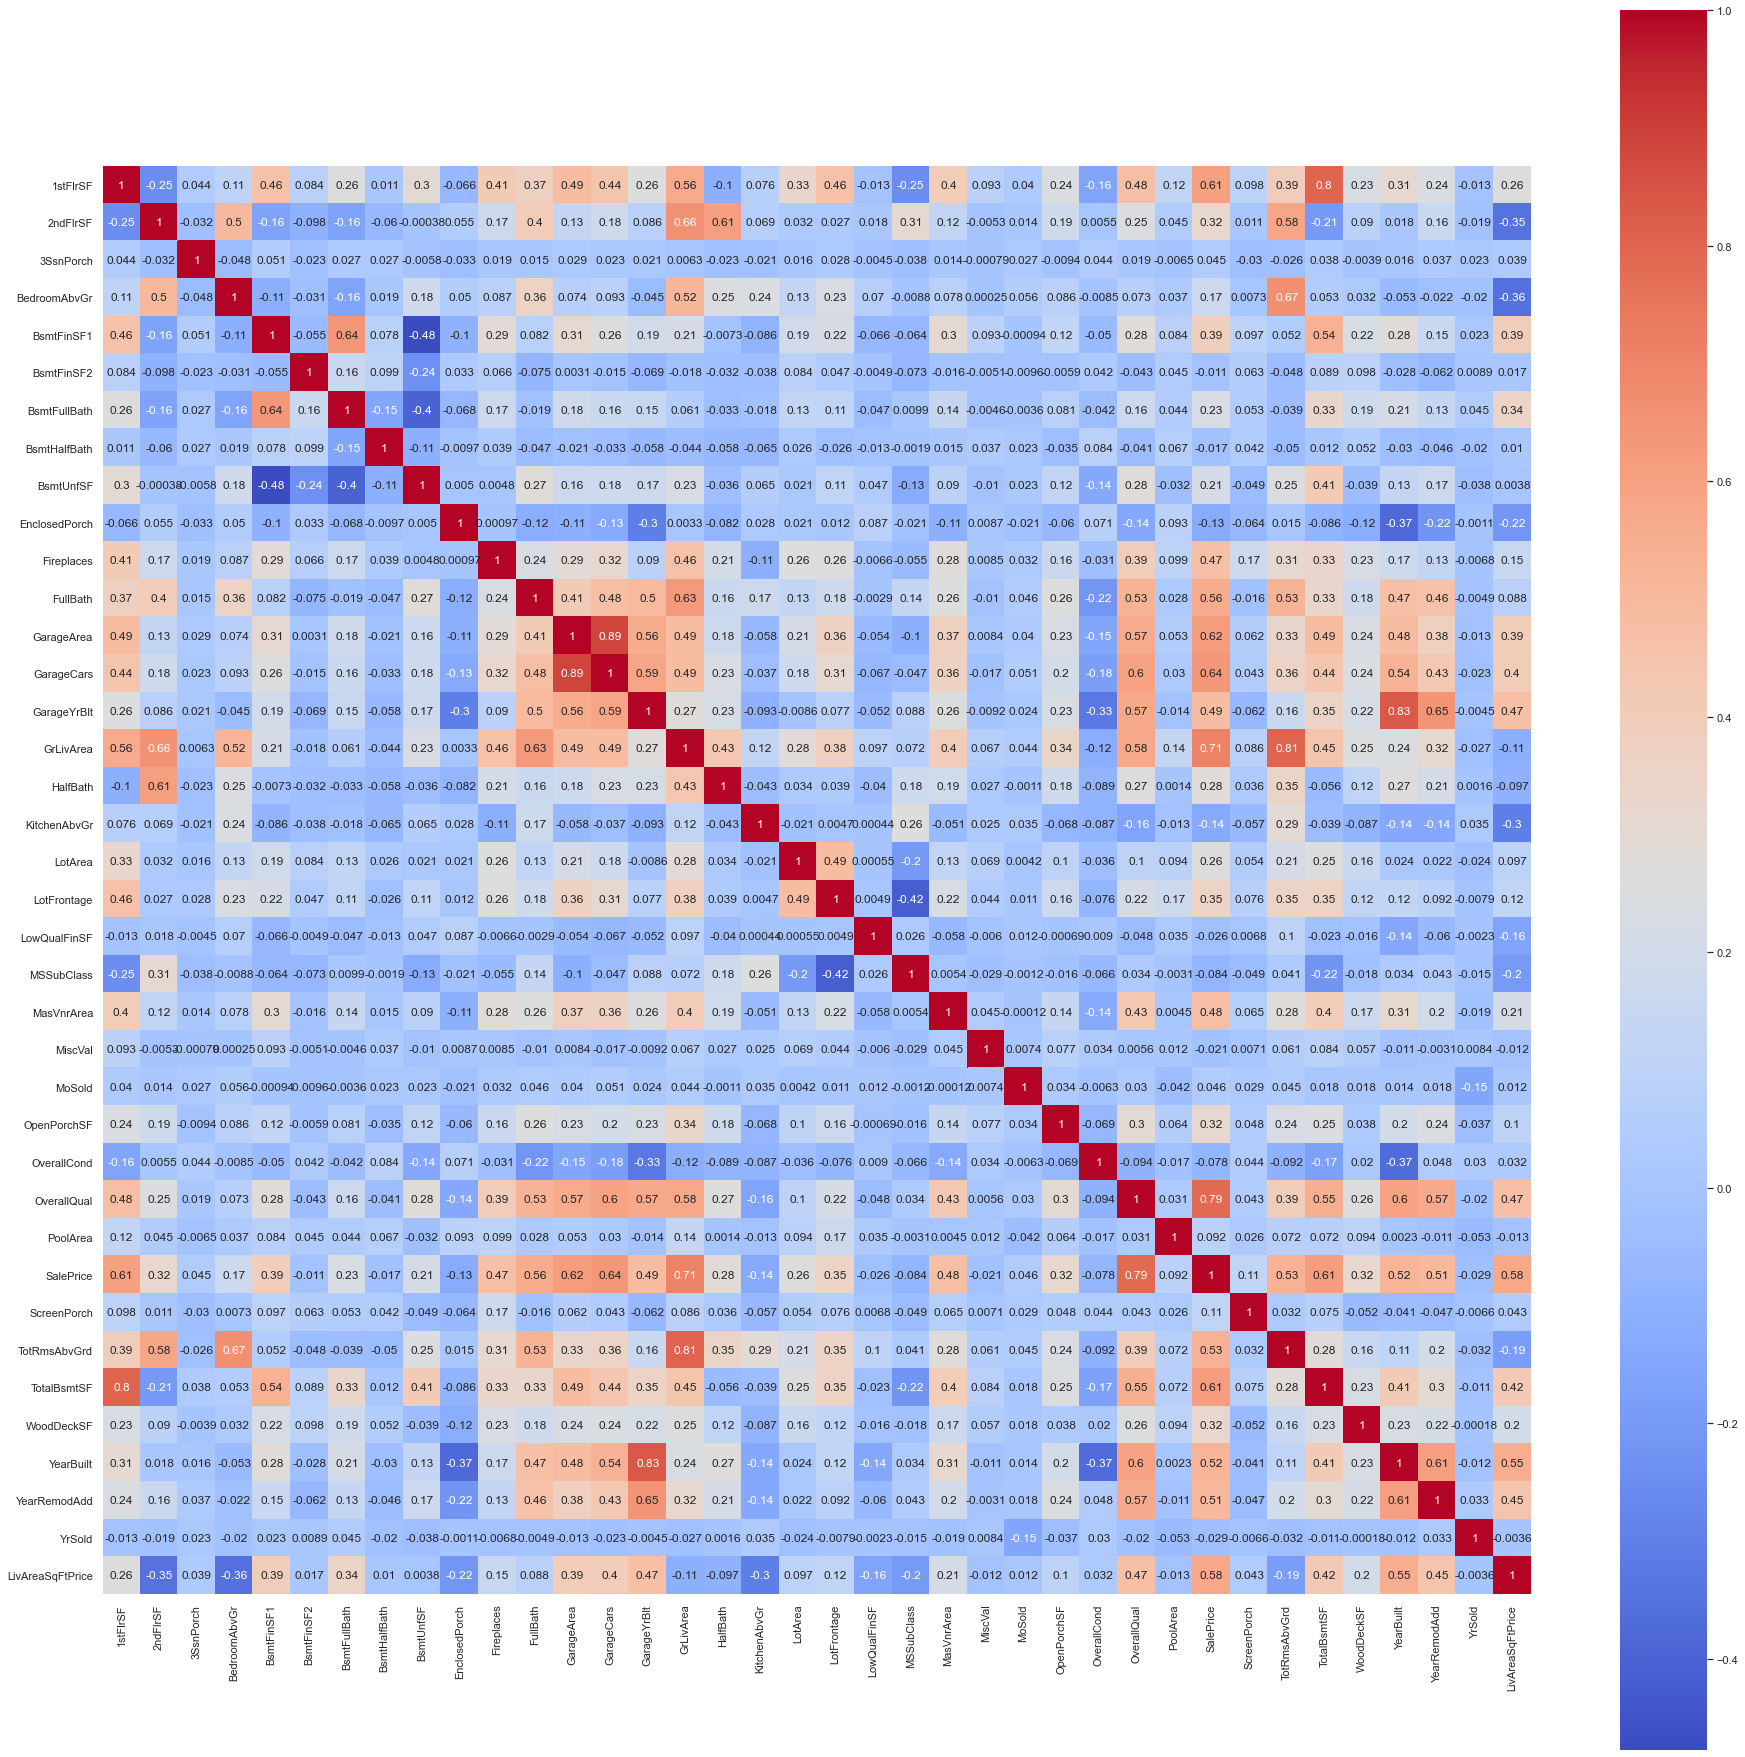

In [60]:
# Correlation between numerical features and SalePrice

plt.figure(figsize=(32, 32))
sns.heatmap(fullDf.drop(['Id'], axis=1).corr(), annot=True, square=True, cmap='coolwarm')